# Nurlan Imanov Mid-Term Exam 

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import math
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Reading image

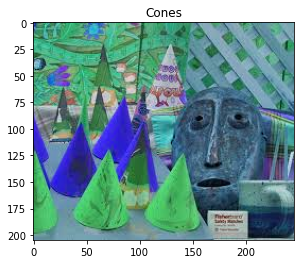

In [32]:
img = cv2.imread('Cones.jpg')
plt.imshow(img)
plt.title('Cones')
plt.show()


In [62]:
# fig = pyplot.figure()
# ax = Axes3D(fig)
colors=["#0000FF", "#00FF00", "#FF0066"]

R = img[:,:,0].reshape(205*246,1)
G = img[:,:,1].reshape(205*246,1)
B = img[:,:,2].reshape(205*246,1)
# ax.scatter(R,c ='r')
# ax.scatter(G,c ='g')
# ax.scatter(B,c ='b')

# pyplot.show()

In [67]:
G[0]

array([38], dtype=uint8)

# Laplacian Edge Detector

In [5]:
def laplacian(img):
    laplacian_kernel = np.array([[0,-1,0],
                                 [-1,4,-1],
                                 [0,-1,0]])


    a = 1
    b = 1

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_pixel = 0
            
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        new_pixel += laplacian_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]                          
                        
                    except :
                        continue # Padding part
                    
            filtered_image[row,column] = new_pixel     
      
    return filtered_image 

In [6]:
laplacian_img = laplacian(img)

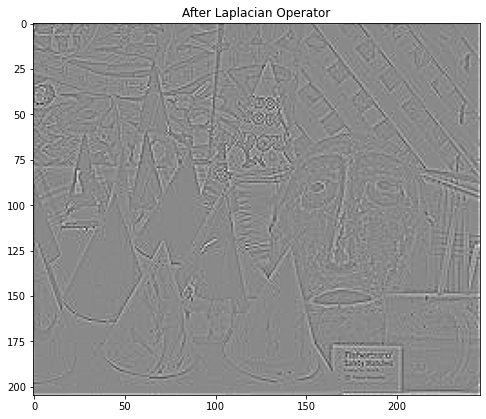

In [7]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(laplacian_img,'gray')
plt.title('After Laplacian Operator')
plt.show()

# Threshold function

In [64]:
def thresholding(img, bound = 100):
    mask = img>bound
    new_img = np.ones(shape = img.shape) * 255
    new_img[mask] = 0
    return new_img.astype(np.uint8)

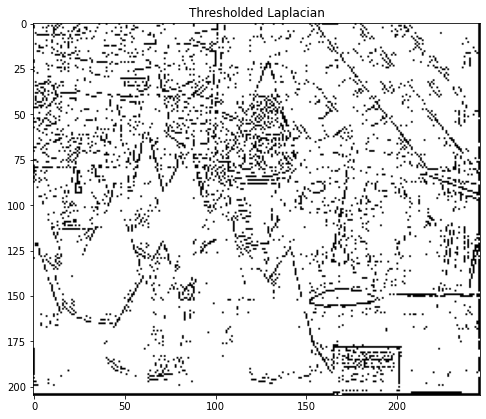

In [16]:
thresholded_laplacian = thresholding(laplacian_img,50)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_laplacian,'gray')
plt.title('Thresholded Laplacian')
plt.show()

# Image Processing Part

In [17]:
def salt_pepper_noise(img,p):
    
    mask = (np.random.randint(100,size = img.shape )>p)
    
    new_img = np.random.randint(2,size = img.shape) * 255
    
    new_img[mask] = img[mask]
    
    return new_img.astype(np.uint8)

# 20 % Salt and Pepper noise

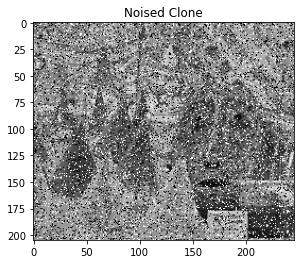

In [38]:
noised_img = salt_pepper_noise(img,20)
plt.imshow(noised_img,'gray')
plt.title('Noised Clone')
plt.show()

# Edge Detection to noised image 

In [21]:
noised_laplacian_img = laplacian(noised_img)

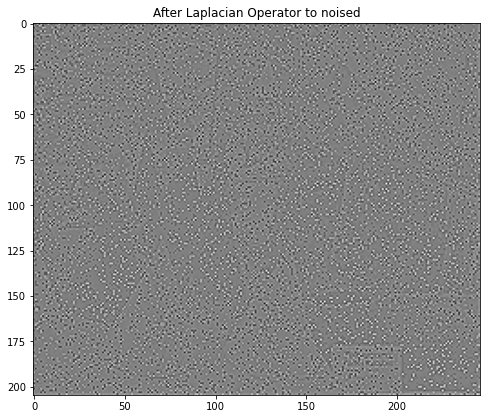

In [22]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(noised_laplacian_img,'gray')
plt.title('After Laplacian Operator to noised')
plt.show()

# Thresholding noised image

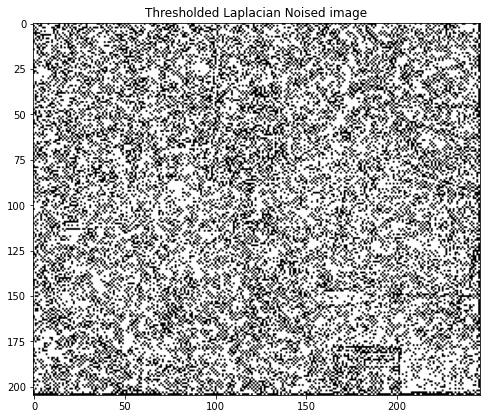

In [26]:
thresholded_laplacian = thresholding(noised_laplacian_img,50)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_laplacian,'gray')
plt.title('Thresholded Laplacian Noised imagenoised_laplacian_img = laplacian(noised_img)')
plt.show()

# Mean Filter to noised image 

In [37]:
def mean_filter(img,m = 3,n = 3):
    
    if(m%2 == 0 or n%2 == 0): 
        raise Exception("m and n can't be a even number")
        
    a = int((m-1) / 2)
    b = int((n-1) / 2)

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_pixel = 0
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        new_pixel += img[row+kernel_row,column+kernel_column]
                        
                    except :
                        new_pixel += 0
                    
            filtered_image[row,column] = int(round(new_pixel / (m*n)))
        
       
    return filtered_image.astype(np.uint8)
    

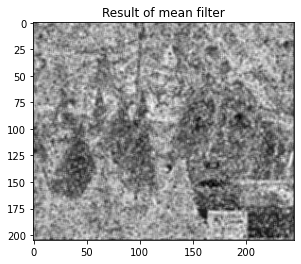

In [39]:
filtered_img_mean = mean_filter(noised_img)    
plt.imshow(filtered_img_mean,'gray')
plt.title('Result of mean filter')
plt.show()   

# Median Filter 

In [29]:
def median_finder(listt):
    listt.sort()
    length = len(listt)
    
    if(length%2 == 1):
        return int(listt[int((length - 1)/2)])
    
    return (int(listt[int(length/2)]) + int(listt[int(length/2)-1]))/2

In [75]:
def median_filter(img,m = 3,n = 3):
    
    if(m%2 == 0 or n%2 == 0): 
        raise Exception("m and n can't be a even number")
        
    a = int((m-1) / 2)
    b = int((n-1) / 2)
        

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            kernel_list = []
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try:
                        kernel_list.append(img[row+kernel_row,column+kernel_column])
                    except:
                        continue
            
                     
       
            filtered_image[row,column] = int(round(median_finder(kernel_list)))
    
     
    return filtered_image.astype(np.uint8)

## I think it was obvious that median filter will work better because scince we have salt and pepper noise

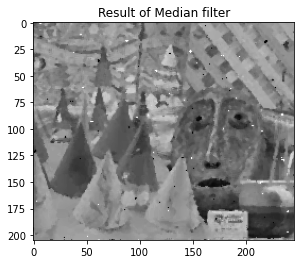

In [40]:
filtered_img_median = median_filter(noised_img)    
plt.imshow(filtered_img_median,'gray')
plt.title('Result of Median filter')
plt.show()   

# Applying Laplacian Edge detector again to Filtered Image

In [44]:
filtered_laplacian_img = laplacian(filtered_img_median)

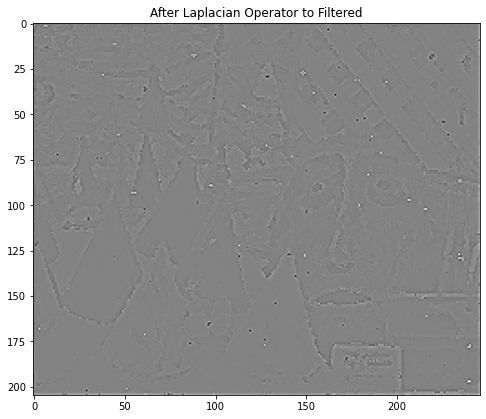

In [45]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(filtered_laplacian_img,'gray')
plt.title('After Laplacian Operator to Filtered')
plt.show()

# Thresholding Filtered Image
## I think it is very bad result due to althought I did filtering there are still noises in image and second order derivative edge detectors are more sensteive than first order ones so I will try to use other first order derivatve edge detector in further steps

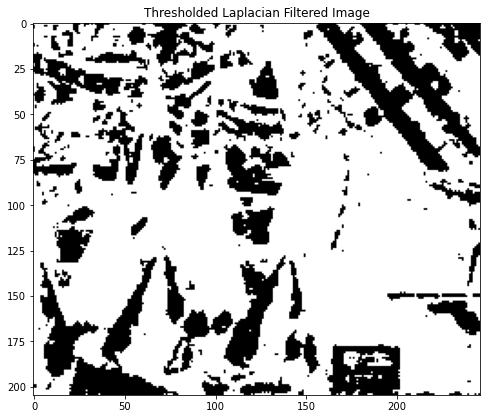

In [67]:
thresholded_laplacian = thresholding(filtered_img_median,150)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_laplacian,'gray')
plt.title('Thresholded Laplacian Filtered Image')
plt.show()

# First order edge detector -- Sobel Edge detector

In [68]:
def sobel(img):
    dx_sobel_kernel = np.array([[1,2,1],
                                [0,0,0],
                                [-1,-2,-1]])

    dy_sobel_kernel = np.array([[1,0,-1],
                                [2,0,-2],
                                [1,0,-1]])
        
    a = 1
    b = 1

    dx = np.zeros(shape = (img.shape[0],img.shape[1]))
    dy = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            dx_new_pixel = 0
            dy_new_pixel = 0
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        dx_new_pixel += dx_sobel_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]                          
                        dy_new_pixel += dy_sobel_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]
                    except :
                        continue
                    
            dx[row,column] = dx_new_pixel
            dy[row,column] = dy_new_pixel
            
        
            
    norm = np.sqrt(np.power(dx,2) + np.power(dy,2))    
    return norm   

In [69]:
result_sobel = sobel(filtered_img_median)

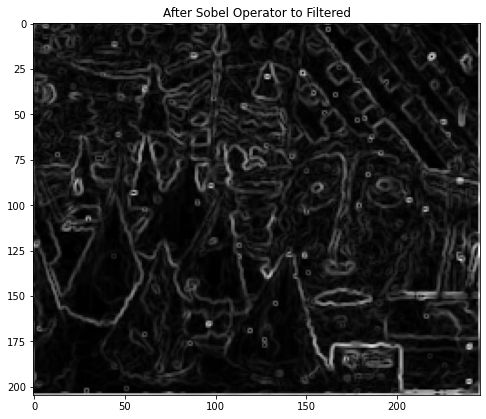

In [74]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(result_sobel,'gray')
plt.title('After Sobel Operator to Filtered')
plt.show()

# Thresholding with Sobel

## I think it is better than previous one. I think the reason was our image is too noisy (20 %) so in these cases although we did median filtering some noises stayed so as I mentioned above scond order derivative edge detectors more sensteive than first order ones , because we take derivative two time

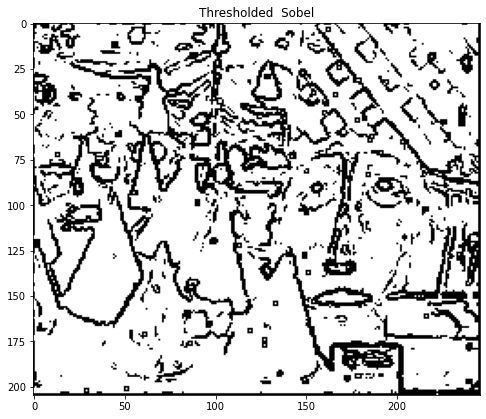

In [73]:
thresholded_result_sobel = thresholding(result_sobel,110)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_result_sobel,'gray')
plt.title('Thresholded  Sobel')
plt.show()

# I know it will be too long but after seeing Sobel is better I want to check Sobel to orginal and noised images too

# To original image

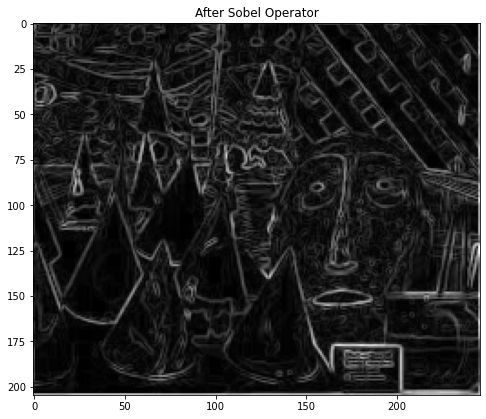

In [83]:
sobel_orginal_img = sobel(img)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(sobel_orginal_img,'gray')
plt.title('After Sobel Operator')
plt.show()

# To noised image

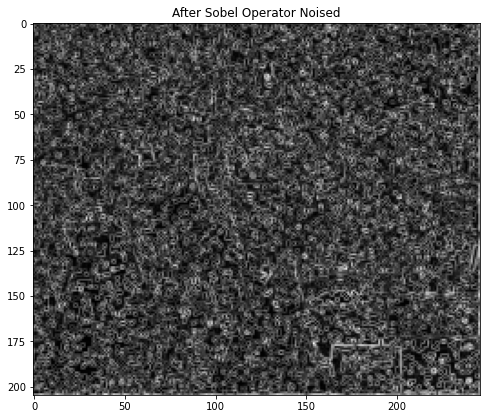

In [87]:
sobel_orginal_img = sobel(noised_img)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(sobel_orginal_img,'gray')
plt.title('After Sobel Operator Noised')
plt.show()

# To filtered one

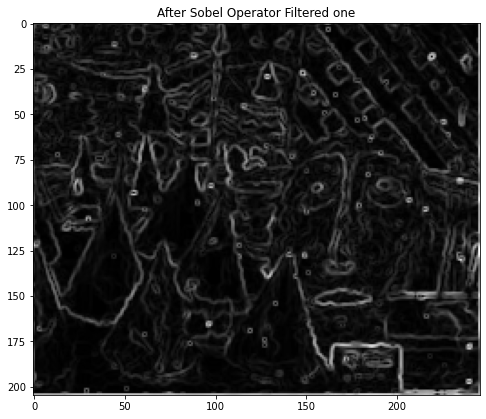

In [91]:
sobel_filtered_img = sobel(filtered_img_median)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(sobel_filtered_img,'gray')
plt.title('After Sobel Operator Filtered one')
plt.show()


 # Part 3

In [116]:
threshold_sobel_orginal = thresholding(sobel_orginal_img)
threshold_sobel_filtered = thresholding(sobel_filtered_img)
np.mean(threshold_sobel_filtered-threshold_sobel_orginal)


0.0

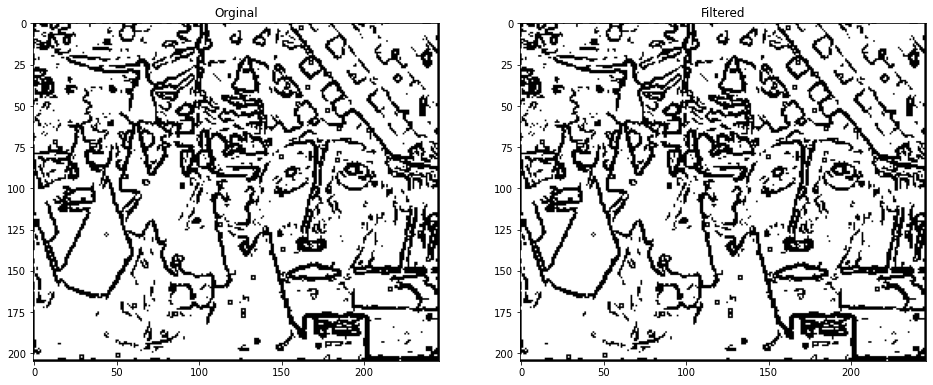

In [95]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(threshold_sobel_orginal,'gray')
plt.title('Orginal')
plt.subplot(1,2,2)
plt.imshow(threshold_sobel_filtered,'gray')
plt.title('Filtered')
plt.show()

In [96]:
np.unique(threshold_sobel_orginal)

array([  0, 255], dtype=uint8)

In [97]:
np.unique(threshold_sobel_filtered)

array([  0, 255], dtype=uint8)

In [100]:
count_orginal = 0
for i in range(threshold_sobel_orginal.shape[0]):
    for j in range(threshold_sobel_orginal.shape[1]):
        if(threshold_sobel_orginal[i,j] == 0 ):
            count_orginal +=1

In [101]:
count_filtered = 0
for i in range(threshold_sobel_filtered.shape[0]):
    for j in range(threshold_sobel_filtered.shape[1]):
        if(threshold_sobel_filtered[i,j] == 0 ):
            count_filtered +=1

In [114]:
histogram_orginal = count_orginal/whole_pixel
histogram_filtered = count_filtered/whole_pixel
histogram_filtered,histogram_orginal

(0.2494150307356732, 0.2494150307356732)

In [112]:
whole_pixel = threshold_sobel_orginal.shape[0] * threshold_sobel_orginal.shape[1]

battacharaya = math.sqrt(histogram_orginal*histogram_filtered)
ln(battacharaya)
# I dont have more time sorry

# Conclusion 

### Image filtering is very important while detecting edges. As we see above after using sobel opeartor actually I could not get any edge in noised image. Edge detection algorithms are really sensetive to noise especially derivative based ones we hav seen the graphical results of them in the lecture. So it is imprtant to filter your image smooth your image and then do your edge detection